# Problem Statement

In this project, we are going to classify an individual whether he/she can get the loan amount based on his/her Income, Education, Working Experience, Loan taken previously, and many more factors.

# Import Libraries

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gradio as gr
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:,.2f}".format

# Read and View dataset

In [51]:
# Read dataset
df = pd.read_csv('loan_data.csv')

# View dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,"1,508.00",128.00,360.00,1.00,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,"2,358.00",120.00,360.00,1.00,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,"1,516.00",95.00,360.00,1.00,Urban,Y


In [52]:
# View shape dataset
df.shape

(381, 13)

In [53]:
# Info about daatset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


# Verify and Clean Null Values

In [54]:
# Verify null values
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
# Quantity each gender 
df.Gender.value_counts() # More 76% are Male

Gender
Male      291
Female     85
Name: count, dtype: int64

In [56]:
# Exchange null values for Male
df['Gender'] = df.Gender.fillna('Male')

In [57]:
# Count dependets column
df.Dependents.value_counts() # More 60% are classify how zero dependets

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

In [58]:
# Exchange null values for mode dependets column
df['Dependents'] = df.Dependents.fillna(df.Dependents.mode()[0])

In [59]:
# Count self employed column
df.Self_Employed.value_counts() 

Self_Employed
No     325
Yes     35
Name: count, dtype: int64

In [60]:
# Exchange null values for 'No'
df['Self_Employed'] = df.Self_Employed.fillna('No')

In [61]:
# Count loan amont term column
df.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.00    312
180.00     29
480.00     11
300.00      7
120.00      3
84.00       3
240.00      2
60.00       1
12.00       1
36.00       1
Name: count, dtype: int64

In [62]:
# Exchange null values for mode loan amount term column
df['Loan_Amount_Term'] = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0])

In [63]:
# Count credit history column
df.Credit_History.value_counts() # More 75% has a credit history

Credit_History
1.00    294
0.00     57
Name: count, dtype: int64

In [64]:
# Exchange null values for mode credit history column
df['Credit_History'] = df.Credit_History.fillna(df.Credit_History.mode()[0])

In [65]:
# The dataset don't have more null values
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Vizualization of data

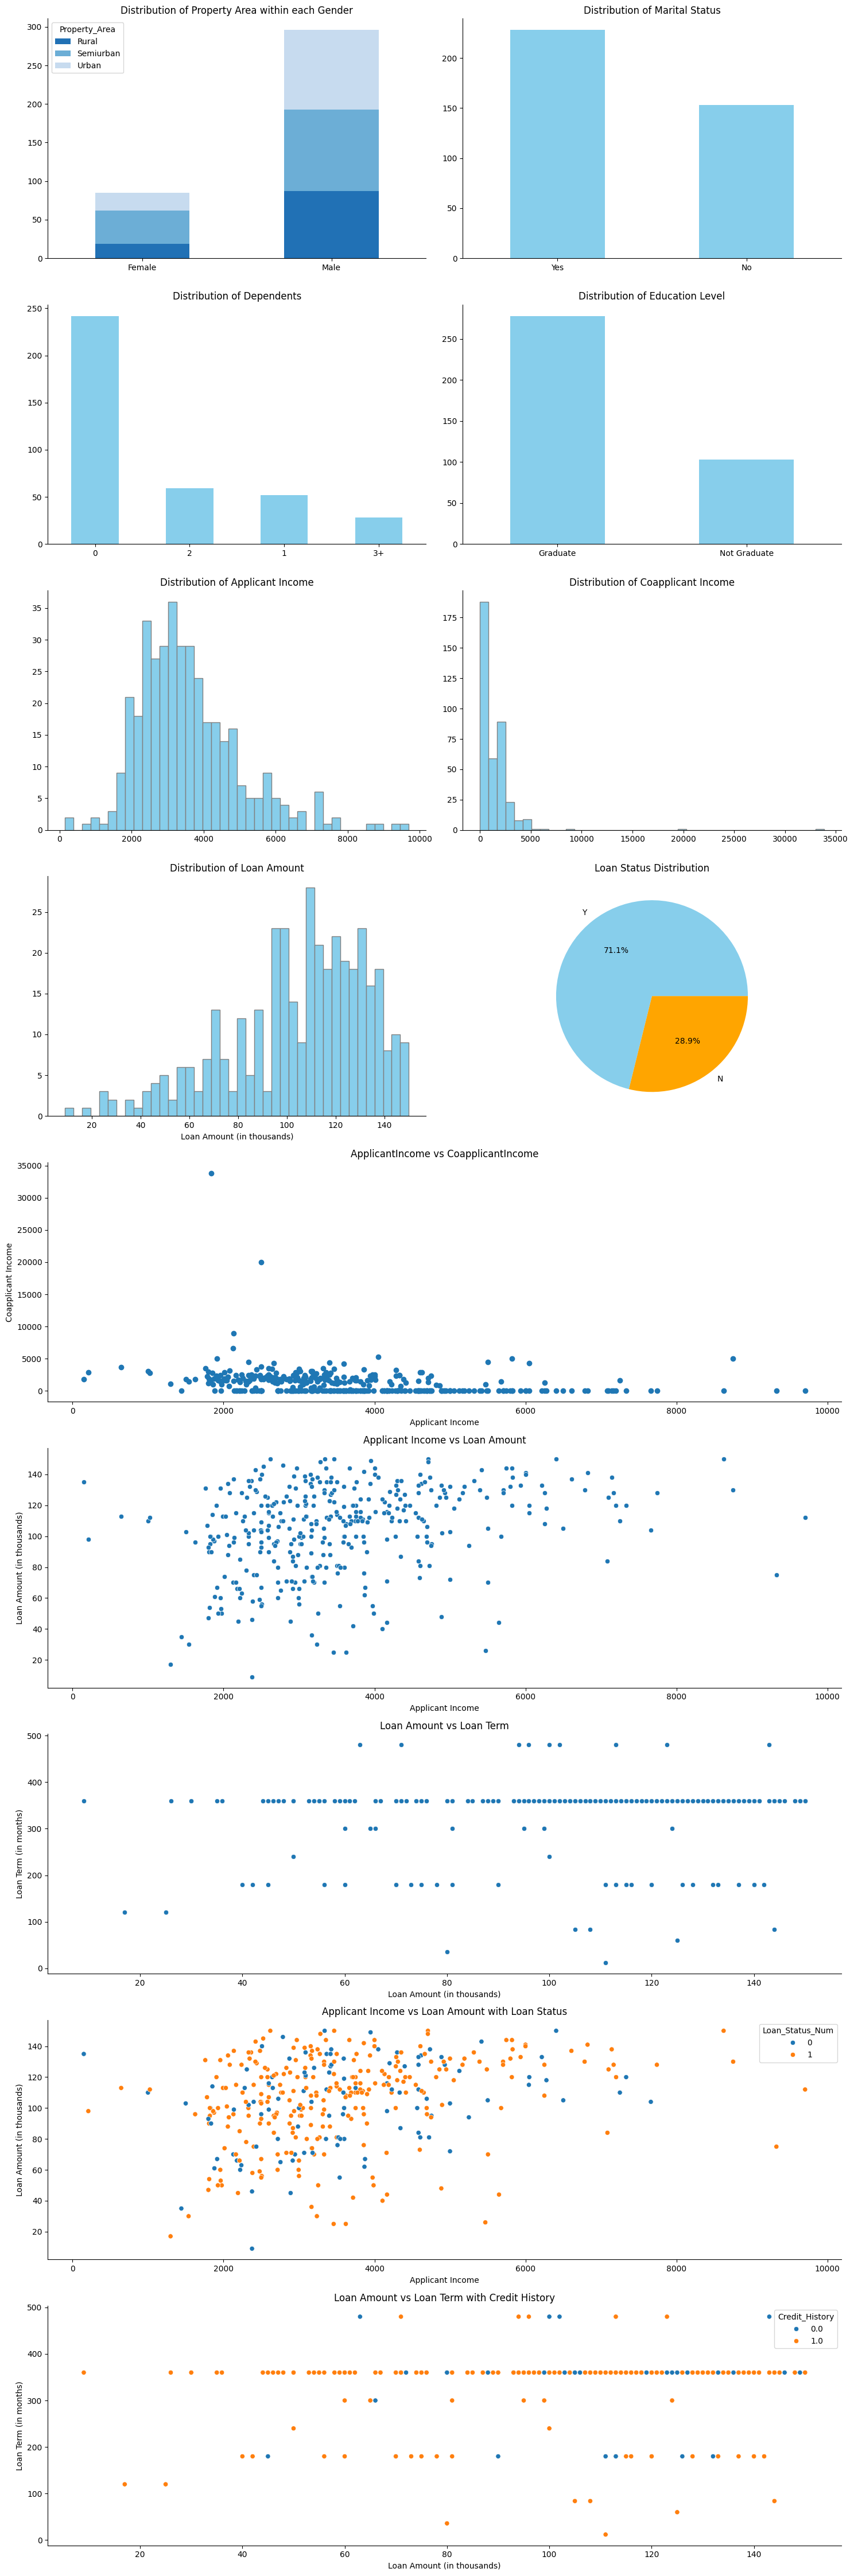

In [66]:
# Creat a subplot of the type mosaic
fig, ax = plt.subplot_mosaic([ ['A', 'B'],
                               ['C', 'D'],
                               ['E', 'F'],
                               ['G', 'H'],
                               ['I', 'I'],
                               ['J', 'J'],
                               ['K', 'K'],
                               ['L', 'L'],
                               ['M', 'M']
                              ],
                              figsize=(15, 45), constrained_layout=True)

# Hide axes
rc = {
    "axes.spines.left" : True,
    "axes.spines.right" : False,
    "axes.spines.bottom" : True,
    "axes.spines.top" : False,
    "xtick.bottom" : True,
    "xtick.labelbottom" : True,
    "ytick.labelleft" : True,
    "ytick.left" : True
}

plt.rcParams.update(rc)


# Distribution of Genders and Property Area
# Create a crosstab of Gender and Property_Area
gender_property_area = pd.crosstab(df['Gender'], df['Property_Area'])

# Create a stacked bar plot with a blue color palette
blue_palette = sns.color_palette("Blues_r", n_colors=3)
gender_property_area.plot(kind='bar', stacked=True, color=blue_palette, ax=ax['A'])

ax['A'].set_title('Distribution of Property Area within each Gender')
ax['A'].set_xlabel('')
labels = ax['A'].get_xticklabels()
ax['A'].set_xticklabels(labels, rotation=0)


# Distribution of marital status
df['Married'].value_counts().plot(kind='bar', ax=ax['B'], color = 'skyblue')
ax['B'].set_title('Distribution of Marital Status')
ax['B'].set_xlabel('')
labels = ax['B'].get_xticklabels()
ax['B'].set_xticklabels(labels, rotation=0)


# Distribution of dependents
df['Dependents'].value_counts().plot(kind='bar', ax=ax['C'], color = 'skyblue')
ax['C'].set_title('Distribution of Dependents')
ax['C'].set_xlabel('')
labels = ax['C'].get_xticklabels()
ax['C'].set_xticklabels(labels, rotation=0)



# Distribution of education level
df['Education'].value_counts().plot(kind='bar', ax=ax['D'], color = 'skyblue')
ax['D'].set_title('Distribution of Education Level')
ax['D'].set_xlabel('')
labels = ax['D'].get_xticklabels()
ax['D'].set_xticklabels(labels, rotation=0)



# Distribution of ApplicantIncome
ax['E'].hist(df['ApplicantIncome'], bins=40, edgecolor='gray', color = 'skyblue')
ax['E'].set_title('Distribution of Applicant Income')
ax['E'].set_xlabel('')


# Distribution of CoapplicantIncome
ax['F'].hist(df['CoapplicantIncome'], bins=40, edgecolor='gray', color = 'skyblue')
ax['F'].set_title('Distribution of Coapplicant Income')
ax['F'].set_xlabel('')


# Distribution of LoanAmount
ax['G'].hist(df['LoanAmount'], bins=40, edgecolor='gray', color = 'skyblue')
ax['G'].set_title('Distribution of Loan Amount')
ax['G'].set_xlabel('Loan Amount (in thousands)')


# Loan Status Distribution
colors = ['skyblue', 'orange']
df['Loan_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax['H'], colors = colors)
ax['H'].set_title('Loan Status Distribution')
ax['H'].set_ylabel('') 


# ApplicantIncome vs CoapplicantIncome
ax['I'].scatter(df['ApplicantIncome'], df['CoapplicantIncome'])
ax['I'].set_title('ApplicantIncome vs CoapplicantIncome')
ax['I'].set_xlabel('Applicant Income')
ax['I'].set_ylabel('Coapplicant Income')

# Applicant Income vs Loan Amount
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df, ax=ax['J'])
ax['J'].set_title('Applicant Income vs Loan Amount')
ax['J'].set_xlabel('Applicant Income')
ax['J'].set_ylabel('Loan Amount (in thousands)')

# Loan Amount vs Loan Term
sns.scatterplot(x='LoanAmount', y='Loan_Amount_Term', data=df, ax=ax['K'])
ax['K'].set_title('Loan Amount vs Loan Term')
ax['K'].set_xlabel('Loan Amount (in thousands)')
ax['K'].set_ylabel('Loan Term (in months)')

# Convert Loan_Status to numerical values for plotting
df['Loan_Status_Num'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Applicant Income vs Loan Amount with Loan Status
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status_Num', data=df, ax=ax['L'])
ax['L'].set_title('Applicant Income vs Loan Amount with Loan Status')
ax['L'].set_xlabel('Applicant Income')
ax['L'].set_ylabel('Loan Amount (in thousands)')

# Loan Amount vs Loan Term with Credit History
sns.scatterplot(x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History', data=df, ax=ax['M'])
ax['M'].set_title('Loan Amount vs Loan Term with Credit History')
ax['M'].set_xlabel('Loan Amount (in thousands)')
ax['M'].set_ylabel('Loan Term (in months)')

plt.tight_layout()
plt.show()


**Gender and Residence:** The dataset predominantly comprises male applicants who are evenly distributed across urban, semi-urban, and rural regions. This suggests that men are actively seeking property loans across all types of geographical areas.

**Marital Status:** A significant proportion of the applicants are married couples, indicating that property loans are commonly pursued by families rather than individuals.

**Dependents:** Interestingly, a large majority of applicants have no dependents, which could potentially indicate a higher disposable income and thus a greater capacity to repay loans.

**Education:** The data reveals that most applicants are graduates, suggesting a higher earning potential and a likely positive impact on loan repayment capabilities.

**Applicant Income:** The majority of applicants have an income ranging between 2000 and 4000, which is an important factor considered by banks when approving loans.

**Co-applicant Income:** It’s noteworthy that the income of most co-applicants is zero, implying that the primary applicant is the main breadwinner.

**Loan Amount:** The loan amounts mostly range between 100k and 130k, which seems to be the preferred range for both the applicants and the bank.

**Loan Approval:** Impressively, more than 70% of applicants are granted loans, indicating a high acceptance rate.

**Income and Loan Amount Relationship:** There exists a relationship between the income of the applicant and the loan amount, suggesting that the bank considers the applicant’s income when determining the loan amount.

**Income, Loan Amount, and Term:** Applicants with an income between 2000 and 4000 typically opt for loans of 100k to 130k with a term of 360 months, indicating a common trend among this income group.

# Converts the categorical data into numerica and Split data into Train and Test

In [67]:
# crat a datafrma copy
df_encoded = df.copy()

# Inicialize the LabelEncoder
le = LabelEncoder()

# Converts the categorical data into numerica with LabelEncoder
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = le.fit_transform(df_encoded[column])

# Dependent variable
y = df_encoded['Loan_Status']

# Independent variable
X = df_encoded.drop(['Loan_ID','Loan_Status', 'Loan_Status_Num'], axis=1)


# Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model ML and Evaluate models

In [68]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)

# Calculate error rate
error_rate = 1 - accuracy

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-Score: {f1}")
print(f"Mean Squared Error: {mse}")
print(f"Specificity: {specificity}")
print(f"Error Rate: {error_rate}")


Accuracy: 0.8181818181818182
Recall: 1.0
Precision: 0.8
F1-Score: 0.8888888888888888
Mean Squared Error: 0.18181818181818182
Specificity: 0.3333333333333333
Error Rate: 0.18181818181818177


**Accuracy:** 81.82% - The model correctly classified 81.82% of the samples.

**Recall:** 100% - The model identified all positive samples correctly (without false negatives).

**Accuracy:** 80% - The model classified 80% of the samples as positive and all of them were correct (without false positives).

**F1-Score:** 88.89% - The model found a good balance between accuracy and recall.

**Mean Square Error (MSE):** 0.1818 - The model presented a relatively low mean error in the prediction of the values.

**Specificity:** 33.33% - The model correctly identified 33.33% of the negative samples (without false positives).

**Error Rate:** 18.18% - The model misclassified 18.18% of the samples.

**Conclusion**

The model presented a good overall performance, with high accuracy, recall and F1-Score.
The MSE indicates that the model fit the data well, with a relatively low average error.
Specificity, however, was low, meaning that the model may have classified some negative samples as positive.
The error rate of 18.18% indicates that the model can still be improved.

# ROC Curve

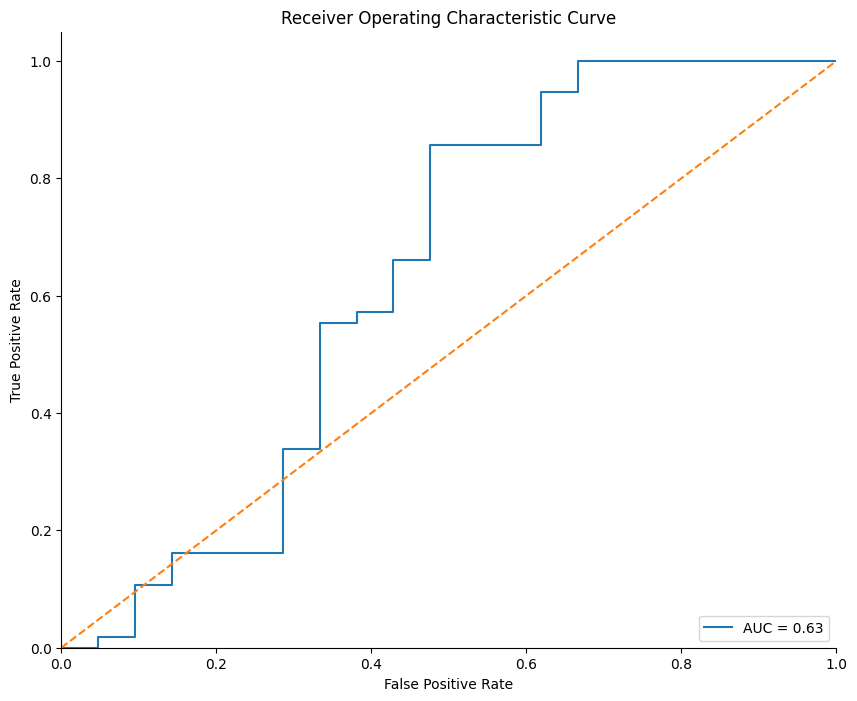

In [69]:
# Predict the probabilities of the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Create a plot
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

# Testing trained model

In [70]:
trained_model = model.fit(X_train, y_train)
trained_model

LogisticRegression()

In [71]:
X_new = X.sample() # function sample, draw a value of the independent variable
predict = (trained_model.predict_proba(X_new)) * 100 # predict in percent

print(f"Yes: {predict[0][1]:.2f}% - No: {predict[0][0]:.2f}%")

Yes: 75.87% - No: 24.13%


# Loan Propensity Prediction System - Find Your Chances of Approval

In [72]:
# Mappings
map_gender = {'Female': 0, 'Male': 1}  # Mapping for Gender
map_married = {'No': 0, 'Yes': 1}  # Mapping for Married
map_dependents = {'0': 0, '1': 1, '2': 2, '3+': 3}  # Mapping for Dependents
map_education = {'Graduate': 0, 'Not Graduate': 1}  # Mapping for Education
map_self_employed = {'No': 0, 'Yes': 1}  # Mapping for Self_Employed
map_credit_history = {'No': 0, 'Yes': 1}  # Mapping for Credit_History
map_property_area = {'Rural': 0, 'Semiurban': 1,'Urban':2}  # Mapping for Property_Area

def predict(*args):
  # Convert string inputs to numbers using the mappings
  args = list(args)
  args[0] = map_gender[args[0]]  # Gender
  args[1] = map_married[args[1]]  # Married
  args[2] = map_dependents[args[2]]  # Dependents
  args[3] = map_education[args[3]]  # Education
  args[4] = map_self_employed[args[4]]  # Self_Employed
  args[9] = map_credit_history[args[9]]  # Credit_History
  args[10] = map_property_area[args[10]]  # Property_Area

  X_new = np.array([args]).reshape(1, -1)
  predict = (trained_model.predict_proba(X_new))

  return {"Yes":predict[0][1], "No":predict[0][0]}

with gr.Blocks() as demo:
  # Panel title
  gr.Markdown(""" # Loan Propensity """)

  with gr.Row():
    with gr.Column():
      gr.Markdown(""" # Client Attributes """)
      Gender = gr.Radio(['Male', 'Female'], label = 'Select your gender')
      Married =  gr.Radio(['No', 'Yes'], label = 'Applicant are married?')
      Dependents = gr.Radio(['0', '1', '2', '3+'], label = 'Number of persons depending on the client')
      Education = gr.Radio(['Graduate', 'Not Graduate'], label = 'Applicant Education')
      Self_Employed = gr.Radio(['No', 'Yes'], label = 'Self-employed?')
      ApplicantIncome = gr.Slider(label="Applicant Income", minimum=0, maximum=9703, step=1, randomize=True)
      CoapplicantIncome = gr.Slider(label="Coapplicant Income", minimum=0.00, maximum=33837, step=1, randomize=True)
      LoanAmount = gr.Slider(label="Loan Amount", minimum=9, maximum=150, step=1, randomize=True)
      Loan_Amount_Term = gr.Radio([12, 36, 60, 84, 120, 180, 240, 300, 360, 480], label = 'Terms of the loan in months')
      Credit_History = gr.Radio(['No', 'Yes'], label = 'Credit history meets guidelines?')
      Property_Area = gr.Radio(['Rural', 'Semiurban', 'Urban'], label = 'Applicants are living either Rural, Semi-Urban or Urban?')

      with gr.Row():
        gr.Markdown(""" # Prediction Button """)
        predict_btn = gr.Button(value="Predict")

    with gr.Column():
      gr.Markdown(""" # Client's Loan Propensity """)
      label = gr.Label()

  # Predict button
  predict_btn.click(
      fn=predict,
      inputs=[
        Gender, 
        Married, 
        Dependents, 
        Education,
        Self_Employed, 
        ApplicantIncome, 
        CoapplicantIncome, 
        LoanAmount,
        Loan_Amount_Term, 
        Credit_History, 
        Property_Area
      ],
      outputs=[label]
      )

demo.launch(debug=True, share=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.
